# <font color=blue> __IBM Applied Data Science Capstone__ </font>

# __ANALYZING TOWNS IN KARACHI AND IDENTIFYING POTENTIAL BUSINESS OPPORTUNITIES__

##  __Muhammad Saad Uddin__ 

### <font color=green> __Part 1. installing all required packages__ </font>

In [1]:
import pandas as pd
import numpy as np

In [2]:
pip install lxml

     |████████████████████████████████| 5.8MB 3.4MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
!conda install -c conda-forge geopy --yes 

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    liblapacke-3.8.0           |      11_openblas          10 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    libopenblas-0.3.6          |       h5a2b251_2         7.7 MB
    numpy-1.17.3               |   py36h95a1406_0         5.2 MB  conda-forge
    sci

In [4]:
 pip install geocoder

     |████████████████████████████████| 102kB 6.7MB/s ta 0:00:011
     |████████████████████████████████| 829kB 13.9MB/s eta 0:00:01
     |████████████████████████████████| 81kB 16.6MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future
Note: you may need to restart the kernel to use updated packages.


In [5]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder
from pandas.io.json import json_normalize
import requests

In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [7]:
import seaborn as sns

In [6]:
import matplotlib
import matplotlib.cm as cm
import matplotlib.colors as colors

In [7]:
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [8]:
import folium

### <font color=green> __Part 2. Fetching & Cleaning Data__ </font>

#### <font color=blue> reading the data from website </font>

In [10]:
df1 = pd.read_html('http://www.kmc.gos.pk/Contents.aspx?id=13')[0]

#### <font color=blue> taking only relevant rows  </font>

In [11]:
df3 = df1.iloc[3:56, :2]

#### <font color=blue> lets check the dataframe </font>

In [12]:
df3.head()

,0,1
3,AIRPORT,72500
4,BALDIA TOWN,75760
5,BOARD OF SECONDARY EDUCATION,75150
6,CANTT,75530
7,CITY GPO,7100


#### <font color=blue> lets rename columns as part of tidy dataset </font>

In [13]:
df3.rename(columns={0: 'Area', 1: 'POSTAL CODE'}, inplace=True)

#### <font color=blue> check df now </font>

In [14]:
df3.head()

,Area,POSTAL CODE
3,AIRPORT,72500
4,BALDIA TOWN,75760
5,BOARD OF SECONDARY EDUCATION,75150
6,CANTT,75530
7,CITY GPO,7100


#### <font color=blue> this looks better now </font>

#### <font color=blue> defining function for getting all lat,long of Area's using geocode </font>

In [9]:
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Karachi, Karachi City, Sindh, Pakistan'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [17]:
coords = [ get_latlng(neighborhood) for neighborhood in df3["Area"].tolist() ]

In [18]:
coords

[[24.90560000000005, 67.08220000000006],
 [24.90560000000005, 67.08220000000006],
 [24.90560000000005, 67.08220000000006],
 [24.90560000000005, 67.08220000000006],
 [24.90560000000005, 67.08220000000006],
 [24.90560000000005, 67.08220000000006],
 [24.90560000000005, 67.08220000000006],
 [24.90560000000005, 67.08220000000006],
 [24.90560000000005, 67.08220000000006],
 [24.90560000000005, 67.08220000000006],
 [24.90560000000005, 67.08220000000006],
 [24.922200000000032, 67.09000000000003],
 [24.90560000000005, 67.08220000000006],
 [24.90560000000005, 67.08220000000006],
 [24.90560000000005, 67.08220000000006],
 [24.90560000000005, 67.08220000000006],
 [24.90560000000005, 67.08220000000006],
 [24.90560000000005, 67.08220000000006],
 [24.90560000000005, 67.08220000000006],
 [24.90560000000005, 67.08220000000006],
 [24.90560000000005, 67.08220000000006],
 [24.90560000000005, 67.08220000000006],
 [24.90560000000005, 67.08220000000006],
 [24.90560000000005, 67.08220000000006],
 [24.9056000000

#### <font color=blue> Now adding lat,long in dataframe </font>

In [19]:
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

In [20]:
df3['Latitude'] = df_coords['Latitude']
df3['Longitude'] = df_coords['Longitude']
df3.head(11)

,Area,POSTAL CODE,Latitude,Longitude
3,AIRPORT,72500,24.9056,67.0822
4,BALDIA TOWN,75760,24.9056,67.0822
5,BOARD OF SECONDARY EDUCATION,75150,24.9056,67.0822
6,CANTT,75530,24.9056,67.0822
7,CITY GPO,7100,24.9056,67.0822
8,CLIFTON,75600,24.9056,67.0822
9,COD,75250,24.9056,67.0822
10,DARUL-ULOOM,75180,24.9056,67.0822
11,DEFENCE SOCIETY,75500,24.9222,67.0900
12,EXPORT PROCESSING ZONE,75150,24.9056,67.0822


#### <font color=blue> Adding data of population and etc for analysis </font>

In [16]:
df = pd.read_csv('Cleandf.csv')

In [17]:
df.rename(columns={'AREA': 'Area'}, inplace=True)

In [18]:
df.head()

,Area,District,Population,No. of Houses,Commerical Per Sq ft
0,AIRPORT,Malir,20149,"3,451","21,600"
1,BALDIA TOWN,West,832768,129667,"12,000"
2,BOARD OF SECONDARY EDUCATION,Central,70855,12683,"21,600"
3,CANTT,South,68877,12731,"21,600"
4,CITY GPO,South,120557,22512,"42,000"


#### <font color=blue> joining both df for anaylysis ready data </font>

In [24]:
#adding cleaned data of population, price for analysis
dfs=pd.merge(df3, df, on='Area', how='inner')

In [25]:
dfs.head()

,Area,POSTAL CODE,Latitude,Longitude,District,Population,No. of Houses,Commerical Per Sq ft
0,AIRPORT,72500,24.888908,67.168704,Malir,20149,3451,21600
1,BALDIA TOWN,75760,24.950482,66.917861,West,832768,129667,12000
2,BOARD OF SECONDARY EDUCATION,75150,24.923856,67.028337,Central,70855,12683,21600
3,CANTT,75530,24.843494,67.035570,South,68877,12731,21600
4,CITY GPO,7100,24.851107,66.999505,South,120557,22512,42000


#### <font color=blue> Now this look perfect! </font>

In [26]:
dfs.dtypes

Area                     object
POSTAL CODE               int64
Latitude                float64
Longitude               float64
District                 object
Population                int64
No. of Houses             int64
Commerical Per Sq ft      int64
dtype: object

### <font color=green> __Part 3. Using Foursquare API and analysing data__ </font>

#### <font color=blue> Using Foursquare API for getting all nearby venues of each area </font>

In [106]:
CLIENT_ID = 'X' # your Foursquare ID
CLIENT_SECRET = 'V' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: X
CLIENT_SECRET:V


#### <font color=blue> Lets check one of the area's venues </font>

In [28]:
neighborhood_latitude = dfs.loc[50, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = dfs.loc[50, 'Longitude'] # neighborhood longitude value

neighborhood_name = dfs.loc[50, 'Area'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of SHAHRA-E-FAISAL are 24.881722699999997, 67.10946120000001.


In [29]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 2500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=XC3F31HOMM2XBPVHPMQZ2ZJRHCK5IR4KAQR4IZUL3WYPAF3D&client_secret=VGJNCICHV0PBPLYD4KB1AFULQN1QFBOSVFP5R5ARGDWR0XJD&v=20180605&ll=24.881722699999997,67.10946120000001&radius=2500&limit=100'

In [30]:
results = requests.get(url).json()

#### <font color=blue> defining a function to get all relevant info of venues (you can further investigate reviews and users by looking at Foursquare API documentation) </font>

In [31]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [32]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Mcdonald’s,Fast Food Restaurant,24.880740,67.109342
1,Pakistan Air Force (PAF) Museum,History Museum,24.869072,67.094364
2,Tutti Frutti,Frozen Yogurt Shop,24.874902,67.088258
3,Subway,Sandwich Place,24.879813,67.087518
4,GreenO Juice Bar,Juice Bar,24.900660,67.116734


#### <font color=blue> Nice, we now have venues with their category for Shahra e Faisal </font>

In [33]:
nearby_venues.shape

(48, 4)

#### <font color=blue> around 46 venues </font>

#### <font color=blue> Lets define function and get venues for all area's of Karachi </font>

In [34]:
#now defining func to get all area's data
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Area', 
                  'Area Latitude', 
                  'Area Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [35]:
Karachi_venues = getNearbyVenues(names=dfs['Area'],
                                   latitudes=dfs['Latitude'],
                                   longitudes=dfs['Longitude']
                                  )

AIRPORT
BALDIA TOWN
BOARD OF SECONDARY EDUCATION
CANTT
CITY GPO
CLIFTON
COD
DARUL-ULOOM
DEFENCE SOCIETY
EXPORT PROCESSING ZONE
FEDERAL B AREA
GULSHAN-E-IQBAL
HABIB BANK
HOTEL METROPOLE
JINNAH POST GRADUATE MEDICAL CENTER
KARACHI GPO
KARACHI UNIVERSITY
KEEMARI
KORANGI CREEK
KORANGI GPO
LANDHI COLONY
LIAQATABAD
LIYARI
MALIR CANTT
MALIR CITY
MANGHOPIR
MANORA
MARIPUR(CE)
MARIPUR(FA)
MEHMOODABAD
MODEL COLONY
MURAD MEMON GOTH
NATIONAL CEMENT INDUSTRY (DALMIA)
NAZIMABAD GPO
NEW KARACHI
NEW TOWN GPO
NORTH NAZIMABAD GPO
ORANGE TOWN
P.C.S.I.R
P.E.C.H.S
PAKISTAN MACHINE TOOL FACTORY
PAKISTAN NAVAL ARMAMENT DEPOT
PAKISTAN STEEL MILLS
PAKISTAN STEEL MILLS TOWN SHIP
PORT MUHAMMAD BIN QASIM
QUAIDABAD
RAFA-E-AAM SOCIETY
S.I.T.E
SADDAR GPO
SHAH FAISAL COLONY
SHAHRA-E-FAISAL
SHER SHAH COLONY
SINDH GOVERNOR HOUSE


In [36]:
print(Karachi_venues.shape)

(871, 7)


In [37]:
Karachi_venues.head()

,Area,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,AIRPORT,24.888908,67.168704,Ramada Plaza Hotel Pool BBQ,24.894331,67.156555,BBQ Joint
1,AIRPORT,24.888908,67.168704,Butler's Chocolate Cafe,24.901609,67.166128,Coffee Shop
2,AIRPORT,24.888908,67.168704,International Flights Arrival Hall,24.899710,67.168393,Airport Terminal
3,AIRPORT,24.888908,67.168704,Butler's Chocolate Cafe,24.901564,67.166139,Café
4,AIRPORT,24.888908,67.168704,McDonald's,24.901517,67.166107,Fast Food Restaurant


#### <font color=blue> Our API has returned many venues with location, that's great </font>

In [38]:
Karachi_venues.groupby('Area').count()

,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Area,,,,,,
AIRPORT,28,28,28,28,28,28
BOARD OF SECONDARY EDUCATION,17,17,17,17,17,17
CANTT,96,96,96,96,96,96
CITY GPO,21,21,21,21,21,21
CLIFTON,15,15,15,15,15,15
COD,35,35,35,35,35,35
DARUL-ULOOM,1,1,1,1,1,1
DEFENCE SOCIETY,8,8,8,8,8,8
FEDERAL B AREA,25,25,25,25,25,25


#### <font color=blue> lets get population, houses and commercial price data per sq ft for each area </font>

In [39]:
#lets join required data for further analysis
kar_analysis = Karachi_venues.join(dfs.set_index('Area'), on='Area')

kar_analysis.head()

,Area,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,POSTAL CODE,Latitude,Longitude,District,Population,No. of Houses,Commerical Per Sq ft
0,AIRPORT,24.888908,67.168704,Ramada Plaza Hotel Pool BBQ,24.894331,67.156555,BBQ Joint,72500,24.888908,67.168704,Malir,20149,3451,21600
1,AIRPORT,24.888908,67.168704,Butler's Chocolate Cafe,24.901609,67.166128,Coffee Shop,72500,24.888908,67.168704,Malir,20149,3451,21600
2,AIRPORT,24.888908,67.168704,International Flights Arrival Hall,24.899710,67.168393,Airport Terminal,72500,24.888908,67.168704,Malir,20149,3451,21600
3,AIRPORT,24.888908,67.168704,Butler's Chocolate Cafe,24.901564,67.166139,Café,72500,24.888908,67.168704,Malir,20149,3451,21600
4,AIRPORT,24.888908,67.168704,McDonald's,24.901517,67.166107,Fast Food Restaurant,72500,24.888908,67.168704,Malir,20149,3451,21600


#### <font color=blue> deleting some repetitive columns </font>

In [40]:
del kar_analysis['Latitude']
del kar_analysis['Longitude']
kar_analysis.head()

,Area,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,POSTAL CODE,District,Population,No. of Houses,Commerical Per Sq ft
0,AIRPORT,24.888908,67.168704,Ramada Plaza Hotel Pool BBQ,24.894331,67.156555,BBQ Joint,72500,Malir,20149,3451,21600
1,AIRPORT,24.888908,67.168704,Butler's Chocolate Cafe,24.901609,67.166128,Coffee Shop,72500,Malir,20149,3451,21600
2,AIRPORT,24.888908,67.168704,International Flights Arrival Hall,24.899710,67.168393,Airport Terminal,72500,Malir,20149,3451,21600
3,AIRPORT,24.888908,67.168704,Butler's Chocolate Cafe,24.901564,67.166139,Café,72500,Malir,20149,3451,21600
4,AIRPORT,24.888908,67.168704,McDonald's,24.901517,67.166107,Fast Food Restaurant,72500,Malir,20149,3451,21600


In [41]:
kar_analysis.dtypes

Area                     object
Area Latitude           float64
Area Longitude          float64
Venue                    object
Venue Latitude          float64
Venue Longitude         float64
Venue Category           object
POSTAL CODE               int64
District                 object
Population                int64
No. of Houses             int64
Commerical Per Sq ft      int64
dtype: object

In [36]:
#if above df was all obkect type we can use below code (just for knowledge sharing)
#cols = ['Area Latitude', 'Area Longitude','Venue Latitude', 'Venue Longitude', 'Population', 'No. of Houses', 'Commerical Per Sq ft']
#kar_analysis[cols] = kar_analysis[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [37]:
kar_analysis.columns

Index(['Area', 'Area Latitude', 'Area Longitude', 'Venue', 'Venue Latitude',
       'Venue Longitude', 'Venue Category', 'POSTAL CODE', 'District',
       'Population', 'No. of Houses', 'Commerical Per Sq ft'],
      dtype='object')

#### <font color=blue> Grouping by pop and houses for each district for visualization </font>

In [46]:
waf_1 = dfs.groupby(['District'])['Population'].sum()
waf_1

District
Central    2972609
East       2810130
Korangi    3322584
Malir      1566602
South      1567694
West       3491491
Name: Population, dtype: int64

In [47]:
waf_2 = dfs.groupby(['District'])['No. of Houses'].sum()
waf_2

District
Central    539127
East       492422
Korangi    566282
Malir      266782
South      285944
West       561270
Name: No. of Houses, dtype: int64

In [40]:
#lets find out count of category for each area
cat_karachi = kar_analysis[kar_analysis['District']=='Central'].groupby(['Area', 'Venue Category'])['Venue Category'].count()
cat_karachi

Area                          Venue Category      
BOARD OF SECONDARY EDUCATION  Bakery                  2
                              Department Store        2
                              Dessert Shop            1
                              Diner                   1
                              Donut Shop              1
                              Fast Food Restaurant    3
                              Food Court              2
                              Juice Bar               1
                              Pizza Place             1
                              Sandwich Place          1
                              Shopping Mall           2
FEDERAL B AREA                African Restaurant      1
                              BBQ Joint               1
                              Bakery                  2
                              Chinese Restaurant      1
                              Department Store        1
                              Dessert Shop           

In [41]:
cat_karachi1 = pd.DataFrame(cat_karachi)

In [42]:
cat_karachi1.head()

Venue Category
Area                         Venue Category                  
BOARD OF SECONDARY EDUCATION Bakery                         2
                             Department Store               2
                             Dessert Shop                   1
                             Diner                          1
                             Donut Shop                     1

In [43]:
cat_karachi1.rename(columns={'Venue Category': 'Venue Category1'}, inplace=True)

In [44]:
cat_karachi1.reset_index(inplace=True)

In [45]:
cat_karachi1.head()

,Area,Venue Category,Venue Category1
0,BOARD OF SECONDARY EDUCATION,Bakery,2
1,BOARD OF SECONDARY EDUCATION,Department Store,2
2,BOARD OF SECONDARY EDUCATION,Dessert Shop,1
3,BOARD OF SECONDARY EDUCATION,Diner,1
4,BOARD OF SECONDARY EDUCATION,Donut Shop,1


#### <font color=blue> Lets analyze district wise venue category  </font>

In [88]:
#for south, east, west, Malir and korangi
south_karachi = kar_analysis[kar_analysis['District']=='South'].groupby(['Venue Category'])['Venue Category'].count()
east_karachi = kar_analysis[kar_analysis['District']=='East'].groupby(['Venue Category'])['Venue Category'].count()
west_karachi = kar_analysis[kar_analysis['District']=='West'].groupby(['Venue Category'])['Venue Category'].count()
Malir_karachi = kar_analysis[kar_analysis['District']=='Malir'].groupby(['Venue Category'])['Venue Category'].count()
Korangi_karachi = kar_analysis[kar_analysis['District']=='Korangi'].groupby(['Venue Category'])['Venue Category'].count()
central_karachi = kar_analysis[kar_analysis['District']=='Central'].groupby(['Venue Category'])['Venue Category'].count()

In [96]:
central_karachi1 = pd.DataFrame(central_karachi)
central_karachi1.rename(columns={'Venue Category': 'Count'}, inplace=True)
central_karachi1.reset_index(inplace=True)
central_karachi1 = central_karachi1.sort_values('Count', ascending=False)
central_karachi1.head()

,Venue Category,Count
9,Fast Food Restaurant,11
3,Bakery,7
22,Shopping Mall,6
11,Food Court,6
19,Pizza Place,5


In [95]:
Korangi_karachi1 = pd.DataFrame(Korangi_karachi)
Korangi_karachi1.rename(columns={'Venue Category': 'Count'}, inplace=True)
Korangi_karachi1.reset_index(inplace=True)
Korangi_karachi1 = Korangi_karachi1.sort_values('Count', ascending=False)
Korangi_karachi1.head()

,Venue Category,Count
20,Fast Food Restaurant,14
10,Burger Joint,7
5,Asian Restaurant,7
35,Pizza Place,7
32,Pakistani Restaurant,6


In [94]:
west_karachi1 = pd.DataFrame(west_karachi)
west_karachi1.rename(columns={'Venue Category': 'Count'}, inplace=True)
west_karachi1.reset_index(inplace=True)
west_karachi1 = west_karachi1.sort_values('Count', ascending=False)
west_karachi1.head()

,Venue Category,Count
1,Beach,3
0,Bakery,1
2,Bus Station,1
3,Cricket Ground,1
4,Food & Drink Shop,1


In [87]:
south_karachi1 = pd.DataFrame(south_karachi)
south_karachi1.rename(columns={'Venue Category': 'Count'}, inplace=True)
south_karachi1.reset_index(inplace=True)
south_karachi1 = south_karachi1.sort_values('Count', ascending=False)
south_karachi1.head()

,Venue Category,Count
41,Market,24
33,Hotel,22
8,Café,22
1,Asian Restaurant,19
2,BBQ Joint,17


In [91]:
east_karachi1 = pd.DataFrame(east_karachi)
east_karachi1.rename(columns={'Venue Category': 'Count'}, inplace=True)
east_karachi1.reset_index(inplace=True)
east_karachi1 = east_karachi1.sort_values('Count', ascending=False)
east_karachi1.head()

,Venue Category,Count
28,Fast Food Restaurant,17
54,Pizza Place,17
7,Bakery,12
6,BBQ Joint,11
23,Department Store,10


In [93]:
malir_karachi1 = pd.DataFrame(Malir_karachi)
malir_karachi1.rename(columns={'Venue Category': 'Count'}, inplace=True)
malir_karachi1.reset_index(inplace=True)
malir_karachi1 = malir_karachi1.sort_values('Count', ascending=False)
malir_karachi1.head()

,Venue Category,Count
2,Airport Terminal,6
15,Fast Food Restaurant,5
0,Airport,4
14,Farm,4
8,Café,3


In [50]:
#temp1 = pd.melt(cat_karachi1, id_vars=["Area",'Venue Category'], value_vars=['Venue Category1'])

In [48]:
#temp1.head()

In [54]:
#cat_karachi7 = cat_karachi1.groupby(['Area','Venue Category'])['Venue Category1'].mean().unstack()

In [55]:
#cat_karachi7

Venue Category,African Restaurant,Bakery,Chinese Restaurant,Department Store,Dessert Shop,Diner,Donut Shop,Fast Food Restaurant,Fish & Chips Shop,Food Court,...,Gym / Fitness Center,Indian Restaurant,Juice Bar,Market,Pizza Place,Restaurant,Sandwich Place,Shopping Mall,Soccer Stadium,Steakhouse
Area,,,,,,,,,,,,,,,,,,,,,
BOARD OF SECONDARY EDUCATION,NaN,1.0,NaN,1.0,1.0,1.0,1.0,3.0,NaN,2.0,...,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,NaN,NaN
FEDERAL B AREA,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,NaN,2.0,...,NaN,NaN,NaN,1.0,3.0,1.0,1.0,2.0,1.0,1.0
LIAQATABAD,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NAZIMABAD GPO,NaN,1.0,NaN,1.0,NaN,NaN,NaN,2.0,NaN,NaN,...,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
NEW KARACHI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NORTH NAZIMABAD GPO,NaN,NaN,1.0,NaN,1.0,1.0,1.0,3.0,NaN,2.0,...,NaN,1.0,NaN,2.0,1.0,NaN,1.0,2.0,NaN,NaN


In [56]:
#not needed
#cat_karachi3 = cat_karachi1.transpose()

In [57]:
#cat_karachi3

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
Area,BOARD OF SECONDARY EDUCATION,BOARD OF SECONDARY EDUCATION,BOARD OF SECONDARY EDUCATION,BOARD OF SECONDARY EDUCATION,BOARD OF SECONDARY EDUCATION,BOARD OF SECONDARY EDUCATION,BOARD OF SECONDARY EDUCATION,BOARD OF SECONDARY EDUCATION,BOARD OF SECONDARY EDUCATION,BOARD OF SECONDARY EDUCATION,...,NORTH NAZIMABAD GPO,NORTH NAZIMABAD GPO,NORTH NAZIMABAD GPO,NORTH NAZIMABAD GPO,NORTH NAZIMABAD GPO,NORTH NAZIMABAD GPO,NORTH NAZIMABAD GPO,NORTH NAZIMABAD GPO,NORTH NAZIMABAD GPO,NORTH NAZIMABAD GPO
Venue Category,Bakery,Department Store,Dessert Shop,Diner,Donut Shop,Fast Food Restaurant,Food Court,Gym / Fitness Center,Juice Bar,Pizza Place,...,Dessert Shop,Diner,Donut Shop,Fast Food Restaurant,Food Court,Indian Restaurant,Market,Pizza Place,Sandwich Place,Shopping Mall
Venue Category1,1,1,1,1,1,3,2,1,1,1,...,1,1,1,3,2,1,2,1,1,2


#### <font color=blue> Lets see which category types dominate the city </font>

In [49]:
#after checking all 6 districts lets check some fun facts then get dummies for concecutive values
dt = kar_analysis['Venue Category'].value_counts()

In [50]:
df_ven = pd.DataFrame(dt)
df_ven.head()

,Venue Category
Fast Food Restaurant,73
Café,41
Market,35
BBQ Joint,34
Pizza Place,32


In [51]:
df_ven.reset_index(inplace=True)

In [52]:
df_ven.rename(columns={'index': 'Venue', 'Venue Category': 'Count'}, inplace=True)

In [53]:
df_ven.head()

,Venue,Count
0,Fast Food Restaurant,73
1,Café,41
2,Market,35
3,BBQ Joint,34
4,Pizza Place,32


### <font color=green> __Part 4. Visualization__ </font>

#### <font color=blue> Using Waffle and Wordcloud for fun and learning purpose </font>

In [54]:
#space for further analysis and or visualization (word cloud, waffle)

In [55]:
%matplotlib inline
from PIL import Image # converting images into arrays
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

In [56]:
# install wordcloud
!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - wordcloud==1.4.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    wordcloud-1.4.1            |           py36_0         324 KB  conda-forge

The following NEW packages will be INSTALLED:

    wordcloud: 1.4.1-py36_0 conda-forge


wordcloud-1.4.1      | 324 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Wordcloud is installed and imported!


In [58]:
#word cloud
total_venues = df_ven['Count'].sum() #have to create df with each cat value
total_venues

871

In [60]:
max_words = 90
word_string = ''
for cat in df_ven.Venue:
    # check if venue's name is a single-word name
    #if len(cat.split(' ')) == 1:
        #repeat_num_times = int(df.loc[cat, 'Count']/float(total_venues)*max_words)
        word_string = word_string + (cat + ' ') #* repeat_num_times)
                                     
# display the generated text
word_string

"Fast Food Restaurant Café Market BBQ Joint Pizza Place Bakery Pakistani Restaurant Hotel Dessert Shop Shopping Mall Restaurant Asian Restaurant Chinese Restaurant Burger Joint Ice Cream Shop Department Store Snack Place Diner Juice Bar Sandwich Place Food Court Beach Clothing Store Gym Performing Arts Venue Coffee Shop Italian Restaurant Airport Terminal Steakhouse Furniture / Home Store Donut Shop Japanese Restaurant Social Club Indian Restaurant American Restaurant Seafood Restaurant Theater Train Station Park Bistro Airport Lounge Bus Station Multiplex Gym / Fitness Center Pharmacy Electronics Store Persian Restaurant Food & Drink Shop Tea Room Middle Eastern Restaurant Miscellaneous Shop Historic Site Supermarket Farm Bookstore Hookah Bar Food Truck Event Space Men's Store Gas Station Airport Athletics & Sports Soccer Field Afghan Restaurant Cricket Ground Frozen Yogurt Shop Yoga Studio Boutique Spa French Restaurant Theme Park Fish & Chips Shop Arcade Flea Market Pier Portuguese 

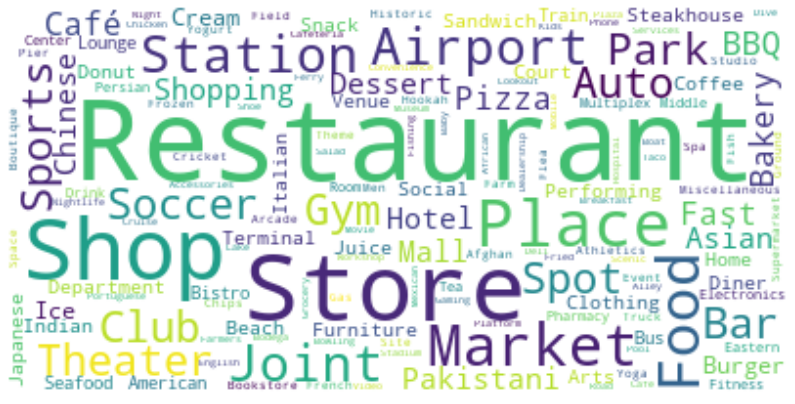

In [61]:
# create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### <font color=blue> Below is another format for WordCloud just for knowledge sharing </font>

In [ ]:
#counts = dfs.value_counts()
#counts.index = counts.index.map(str)

#Below alternative works for pandas versions >= 0.19.0
#counts.index = counts.index.astype(str)

In [ ]:
'''wordcloud = WordCloud().generate_from_frequencies(counts)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()'''

#### <font color=blue> Using Waffle charts </font>

In [ ]:
#waffle, we have created dicts from dfs for simplifying visualization

In [62]:
pip install pywaffle

     |████████████████████████████████| 532kB 3.4MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [63]:
import matplotlib.pyplot as plt
from pywaffle import Waffle

In [64]:
waff_1 = pd.DataFrame(waf_1)
waff_1.reset_index(inplace=True)
waff_1.rename(columns={'index': 'Count'}, inplace=True)
#waf1_dict = dict(zip(waff_1.District, waff_1.Count))

In [65]:
waff_1.head()

,District,Population
0,Central,2972609
1,East,2810130
2,Korangi,3322584
3,Malir,1566602
4,South,1567694


In [66]:
# compute the proportion of each category with respect to the total
total_values = sum(waff_1['Population'])
category_proportions = [(float(value) / total_values) for value in waff_1['Population']]

# print out proportions
for i, proportion in enumerate(category_proportions):
    print (waff_1.District.values[i] + ': ' + str(proportion))

Central: 0.18896371584713348
East: 0.17863520120322088
Korangi: 0.21121103342357914
Malir: 0.09958623390212133
South: 0.09965565049128765
West: 0.22194816513265753


In [67]:
width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

# compute the number of tiles for each catagory
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

# print out number of tiles per category
for i, tiles in enumerate(tiles_per_category):
    print (waff_1.District.values[i] + ': ' + str(tiles)) #repeat for waff_2

Central: 76
East: 71
Korangi: 84
Malir: 40
South: 40
West: 89


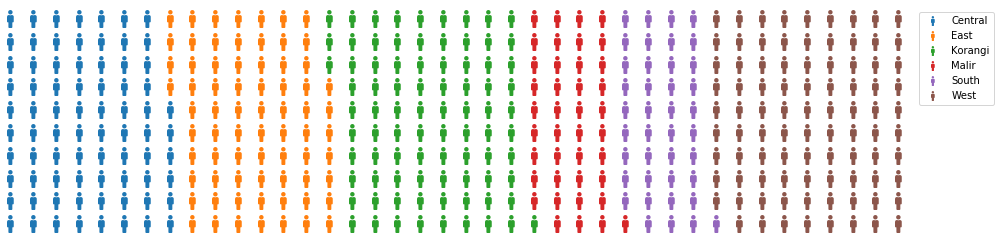

In [68]:
data = {'Central': 76, 'East': 71, 'Korangi': 84, 'Malir': 40, 'South': 40, 'West': 89}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    columns=40,
    values=data, 
    cmap_name="tab10",
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='male', icon_size=18, 
    icon_legend=True,
    figsize=(14, 18)
)

In [70]:
waff_2 = pd.DataFrame(waf_2)
waff_2.reset_index(inplace=True)

In [73]:
waff_2.head()

,District,No. of Houses
0,Central,539127
1,East,492422
2,Korangi,566282
3,Malir,266782
4,South,285944


In [75]:
# compute the proportion of each category with respect to the total
total_values = sum(waff_2['No. of Houses'])
category_proportions1 = [(float(value) / total_values) for value in waff_2['No. of Houses']]

# print out proportions
for i, proportion in enumerate(category_proportions):
    print (waff_2.District.values[i] + ': ' + str(proportion))

Central: 0.18896371584713348
East: 0.17863520120322088
Korangi: 0.21121103342357914
Malir: 0.09958623390212133
South: 0.09965565049128765
West: 0.22194816513265753


In [76]:
width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

# compute the number of tiles for each catagory
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions1]

# print out number of tiles per category
for i, tiles in enumerate(tiles_per_category):
    print (waff_2.District.values[i] + ': ' + str(tiles)) #repeat for waff_2

Central: 80
East: 73
Korangi: 84
Malir: 39
South: 42
West: 83


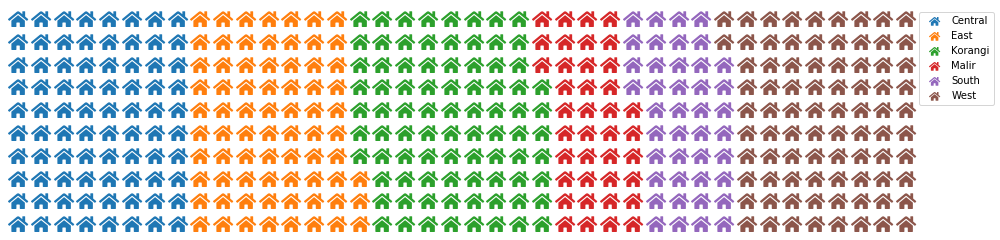

In [77]:
data = {'Central': 80, 'East': 73, 'Korangi': 84, 'Malir': 39, 'South': 42, 'West': 83}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    columns=40,
    values=data, 
    cmap_name="tab10",
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='home', icon_size=18, 
    icon_legend=True,
    figsize=(14, 18)
)

#### <font color=blue> Using Folium for Spatial visualization </font>

In [78]:
#Lets visualize all area of karachi on map
address = 'Karachi, Pakistan'

geolocator = Nominatim(user_agent="on_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Karachi are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Karachi are 25.1446897, 67.1847767315734.


In [79]:
map_khi = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(dfs['Latitude'], dfs['Longitude'], dfs['Area']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_khi)  
    
map_khi

### <font color=green> __Part 5. Advance Analysis__ </font>

#### <font color=blue> encoding venue data to check area wise venue frequency and most often category of each area </font>

In [87]:
# checking most common veneus of each area
Khi_freq = pd.get_dummies(kar_analysis[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Khi_freq['Area'] = kar_analysis['Area']
Khi_freq['No. of Houses'] = kar_analysis['No. of Houses']
Khi_freq['Commerical Per Sq ft'] = kar_analysis['Commerical Per Sq ft']
Khi_freq['Population'] = kar_analysis['Population']

# move neighborhood column to the first column
fixed_columns = [Khi_freq.columns[-1]] + list(Khi_freq.columns[:-1])
Khi_freq = Khi_freq[fixed_columns]

Khi_freq.head()

,Population,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Terminal,American Restaurant,Arcade,Asian Restaurant,...,Taco Place,Tea Room,Theater,Theme Park,Train Station,Video Store,Yoga Studio,Area,No. of Houses,Commerical Per Sq ft
0,20149,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,AIRPORT,3451,21600
1,20149,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,AIRPORT,3451,21600
2,20149,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,AIRPORT,3451,21600
3,20149,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,AIRPORT,3451,21600
4,20149,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,AIRPORT,3451,21600


In [91]:
# move neighborhood column to the first column
fixed_columns = [Khi_freq.columns[-1]] + list(Khi_freq.columns[:-1])
Khi_freq = Khi_freq[fixed_columns]

Khi_freq.head()

,Area,No. of Houses,Commerical Per Sq ft,Population,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Terminal,...,Sports Club,Steakhouse,Supermarket,Taco Place,Tea Room,Theater,Theme Park,Train Station,Video Store,Yoga Studio
0,AIRPORT,3451,21600,20149,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AIRPORT,3451,21600,20149,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AIRPORT,3451,21600,20149,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,AIRPORT,3451,21600,20149,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,AIRPORT,3451,21600,20149,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
#if still any re arranging required
#reindexing so MB col will come on first
#Khi_freq = Khi_freq.reindex_axis(['Area'] + list(Ctoronto_onehot.columns[:-1]), axis=1)

In [92]:
Khi_freq1 = Khi_freq.groupby('Area').mean().reset_index()
Khi_freq1 #can change it to disctrict wise]

,Area,No. of Houses,Commerical Per Sq ft,Population,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Terminal,...,Sports Club,Steakhouse,Supermarket,Taco Place,Tea Room,Theater,Theme Park,Train Station,Video Store,Yoga Studio
0,AIRPORT,3451,21600,20149,0.000000,0.000000,0.00,0.035714,0.071429,0.178571,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,BOARD OF SECONDARY EDUCATION,12683,21600,70855,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,CANTT,12731,21600,68877,0.010417,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.020833,0.020833,0.000000,0.000000,0.010417,0.000000,0.010417,0.010417,0.000000
3,CITY GPO,22512,42000,120557,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,CLIFTON,40577,81000,214157,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,COD,15858,12000,97016,0.000000,0.028571,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.028571,0.000000,0.000000,0.000000,0.000000,0.028571,0.000000,0.000000
6,DARUL-ULOOM,17621,12000,101400,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,DEFENCE SOCIETY,17390,81000,91781,0.125000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,FEDERAL B AREA,95767,42000,495892,0.000000,0.000000,0.04,0.000000,0.000000,0.000000,...,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,GULSHAN-E-IQBAL,115686,64800,644362,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.023256,0.000000,0.000000,0.023256,0.000000,0.000000,0.000000


#### <font color=blue> Lets see frequency of top 5 venue category of each area of Karachi </font>

In [95]:
num_top_venues = 5

for hood in Khi_freq1['Area']:
    print("----"+hood+"----")
    temp = Khi_freq1[Khi_freq1['Area'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----AIRPORT----
                  venue  freq
0      Airport Terminal  0.18
1                  Café  0.11
2  Fast Food Restaurant  0.11
3        Airport Lounge  0.07
4                 Hotel  0.07


----BOARD OF SECONDARY EDUCATION----
                  venue  freq
0  Fast Food Restaurant  0.18
1            Food Court  0.12
2         Shopping Mall  0.12
3      Department Store  0.12
4        Sandwich Place  0.06


----CANTT----
              venue  freq
0  Asian Restaurant  0.05
1            Market  0.05
2             Hotel  0.05
3              Café  0.04
4    Clothing Store  0.04


----CITY GPO----
                  venue  freq
0                  Café  0.14
1            Restaurant  0.10
2             BBQ Joint  0.10
3          Dessert Shop  0.10
4  Fast Food Restaurant  0.10


----CLIFTON----
                  venue  freq
0             BBQ Joint  0.27
1    Chinese Restaurant  0.13
2          Dessert Shop  0.07
3  Fast Food Restaurant  0.07
4              Pharmacy  0.07


----COD----
  

#### <font color=blue> Defining function to arrange most common venue category in dataframe </font>

In [96]:
#define func to get most common occurance category
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [97]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Area']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
khi_venues_sorted = pd.DataFrame(columns=columns)
khi_venues_sorted['Area'] = Khi_freq1['Area']

for ind in np.arange(Khi_freq1.shape[0]):
    khi_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Khi_freq1.iloc[ind, :], num_top_venues)

khi_venues_sorted.head()

,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,AIRPORT,Airport Terminal,Fast Food Restaurant,Café,Hotel,Airport Lounge
1,BOARD OF SECONDARY EDUCATION,Fast Food Restaurant,Shopping Mall,Food Court,Department Store,Bakery
2,CANTT,Market,Asian Restaurant,Hotel,Café,Clothing Store
3,CITY GPO,Café,Restaurant,Dessert Shop,BBQ Joint,Fast Food Restaurant
4,CLIFTON,BBQ Joint,Chinese Restaurant,Dessert Shop,Fried Chicken Joint,Pharmacy


In [103]:
one = khi_venues_sorted['1st Most Common Venue'].value_counts()
one.head()

Fast Food Restaurant    11
Café                     5
Beach                    3
Market                   2
Pier                     2
Name: 1st Most Common Venue, dtype: int64

In [104]:
two = khi_venues_sorted['2nd Most Common Venue'].value_counts()
two.head()

Yoga Studio             8
Fast Food Restaurant    6
Restaurant              3
Shopping Mall           3
Pakistani Restaurant    3
Name: 2nd Most Common Venue, dtype: int64

In [105]:
three = khi_venues_sorted['3rd Most Common Venue'].value_counts()
three.head()

Farmers Market          7
Dessert Shop            4
Asian Restaurant        3
Fast Food Restaurant    3
Hotel                   2
Name: 3rd Most Common Venue, dtype: int64

### <font color=green> __Part 6. Defining Clusters via DBSCAN (machine Learning)__ </font>

In [80]:
#clustering via DBSCAN
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline

In [84]:
import sklearn.utils
sklearn.utils.check_random_state(1000)
Clus_dataSet = dfs[['Latitude','Longitude','Population','No. of Houses','Commerical Per Sq ft']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=2).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
dfs["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
dfs[["Area","Clus_Db"]].head(5)

,Area,Clus_Db
0,AIRPORT,0
1,BALDIA TOWN,-1
2,BOARD OF SECONDARY EDUCATION,0
3,CANTT,0
4,CITY GPO,-1


#### <font color=blue> Using DBSCAN at level 2 we found that it divide our data into 10 clusters </font>

In [85]:
dfs["Clus_Db"].unique()

array([ 0, -1,  1,  2,  3,  4,  5,  6,  7,  8])

In [ ]:
#also on foliium

In [86]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
kclusters = 2
# set color scheme for the clusters
x = np.arange(clusterNum)
ys = [i + x + (i*x)**2 for i in range(clusterNum)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(dfs['Latitude'], dfs['Longitude'], dfs['Area'], dfs['Clus_Db']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### <font color=blue> __Thankyou__ </font>

### Please feel free to contact me if you want any help or want to further contribution in this notebook here or on https://www.linkedin.com/in/muhammad-saad-31740060/